# When using Google Colab, run the following code

## Mounting Google Drive

In [1]:
# """
# Mounting Google Drive
# """
# from google.colab import drive

# drive.mount("/content/gdrive")

## Install Poetry in the colab runtime environment

In [2]:
# !poetry --version

In [3]:
# !pip install poetry

In [4]:
# !poetry --version

In [5]:
# !poetry config --list

In [6]:
# # Configure poetry to create virtual environments in the project folder

# !poetry config virtualenvs.in-project true

## Installing Project Dependencies

In [7]:
# !pwd

In [8]:
# %cd /content/gdrive/MyDrive/GitHubProjects/test_poetry_project

In [9]:
# !pwd

In [10]:
# # !ls -a
# !rm -rf .venv/

In [11]:
# !make env-colab

* **Adding additional packages to the virtual environment (USEFUL ONLY IF CREATING VIRTUAL ENVIRONMENT IN PROJECT FOLDER IN COLAB)**

In [12]:
# '''
# Add any package like 'torch'
# '''

# !poetry add torch
# !poetry install --no-ansi --no-root

* **Add poetry virtual environment to python path (USEFUL ONLY IF CREATING VIRTUAL ENVIRONMENT IN PROJECT FOLDER IN COLAB)**

In [13]:
# """
# Add poetry virtual environment to python
# path so that all installed dependencies
# can be found by the python interpreter.
# """

# import os
# import sys

# VENV_PATH = "/content/gdrive/MyDrive/GitHubProjects/test_poetry_project/.venv/lib/python3.10/site-packages"
# LOCAL_VENV_PATH = "/content/venv"  # local notebook
# os.symlink(VENV_PATH, LOCAL_VENV_PATH)  # connect to directory in drive
# sys.path.insert(0, LOCAL_VENV_PATH)

* **Use the added packages (EXAMPLE CODE)**

In [14]:
# import torch
# logging.info(torch.__version__)

* **Check the size of the virtual environment**

In [15]:
# !du -hs /content/gdrive/MyDrive/GitHubProjects/test_poetry_project/.venv/

## Format with black

In [16]:
# Install black
# !pip install "black[jupyter]"

# Format using black
# !black /content/gdrive/MyDrive/GitHubProjects/test_poetry_project/notebooks/

# Importing Libraries

In [17]:
# Import basic libraries
import os
import requests
import numpy as np
import pandas as pd

pd.set_option("display.max_columns", None)

import calendar
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns

# # from nsepython import *
from nsepythonserver import *

%matplotlib inline

# Configure the logging module
import logging

# Specify the path to the log file
LogFile = "NSEDataNiftyExpMv60Dte.log"

# Open the log file in write mode to clear its contents
with open(LogFile, "w"):
    pass

# Configure the logging
logging.basicConfig(
    filename=LogFile,
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
)

# Functions

# Variables

# Data Import, Cleaning

## Data Import from Google Colab

In [18]:
# '''
# Upload the file from local system to Google Colab
# '''
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   logging.info('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

# """
# Read the file from Google Drive
# """
# RawNiftyDf = pd.read_csv(
#     "/content/gdrive/MyDrive/GitHubProjects/test_poetry_project/nifty_historic.csv"
# )
# RawIndiaVixDf = pd.read_csv(
#     "/content/gdrive/MyDrive/GitHubProjects/test_poetry_project/indiavix_historic.csv"
# )

## Data Import from Asmsl

In [19]:
# """
# Read the file from Asmsl
# """
# RawNiftyDf = pd.read_csv(
#     "/home/studio-lab-user/6MyProjectsData/test_poetry_project/data/raw/nifty_historic.csv"
# )
# RawIndiaVixDf = pd.read_csv(
#     "/home/studio-lab-user/6MyProjectsData/test_poetry_project/data/raw/indiavix_historic.csv"
# )

## Data Import from Desktop

In [20]:
"""
Read the file from Desktop
"""
RawExpMvDf = pd.read_excel(
    "/home/shankar/MEGAsync/6MyProjectsData/test_poetry_project/data/processed/NiftyDfVerifiedTradeSignal.xlsx"
)

# Create ExpMvDf

In [21]:
ExpMvDf = RawExpMvDf.copy()

In [22]:
ExpMvDf[20:80]

,Open,High,Close,Low,Date,IndiaVix,Rsi,RsiSignal,BbUpper,BbLower,BbSignal,MacdLine,SignalLine,MacdHistogram,MacdSignal,Ema1,Ema2,EmasSignal,StochK,StochD,StochasticSignal,TradeSignal,LongEntry,LongExit,ShortEntry,ShortExit,ProfitLoss,VerifiedSignal
20,7589.50,7600.45,7555.95,7541.25,2016-02-01 15:30:00,17.8900,49.551136,0,7800.881027,7230.163973,0,NaN,NaN,NaN,0,7481.245847,7580.164647,0,86.553812,73.925651,0,0,0.00,0.00,0.00,0.00,0.0,0
21,7566.65,7576.30,7455.55,7428.05,2016-02-02 15:30:00,18.0350,47.046448,0,7753.664150,7243.805850,0,NaN,NaN,NaN,0,7476.573875,7570.578905,0,58.918249,78.014890,-1,0,0.00,0.00,0.00,0.00,0.0,0
22,7392.45,7419.40,7361.80,7350.30,2016-02-03 15:30:00,18.5875,39.643779,0,7700.851067,7254.333933,0,NaN,NaN,NaN,0,7455.705898,7554.518989,0,33.113130,59.528397,0,0,0.00,0.00,0.00,0.00,0.0,0
23,7411.45,7457.05,7404.00,7365.95,2016-02-04 15:30:00,18.2075,43.259568,0,7648.311287,7273.173713,0,NaN,NaN,NaN,0,7446.304825,7542.940605,0,45.270929,45.767436,0,0,0.00,0.00,0.00,0.00,0.0,0
24,7418.25,7503.15,7489.10,7406.65,2016-02-05 15:30:00,18.1150,52.641063,0,7638.027688,7275.537312,0,NaN,NaN,NaN,0,7454.085766,7538.799020,0,68.978966,49.121008,1,0,0.00,0.00,0.00,0.00,0.0,0
25,7489.70,7512.55,7387.25,7363.20,2016-02-08 15:30:00,20.2575,51.837769,0,7616.327905,7275.827095,0,-23.412065,NaN,NaN,0,7441.933809,7527.141403,0,40.604541,51.618146,-1,0,0.00,0.00,0.00,0.00,0.0,0
26,7303.95,7323.45,7298.20,7275.15,2016-02-09 15:30:00,21.7275,43.094229,0,7605.786390,7259.803610,0,-31.683008,NaN,NaN,0,7415.800389,7509.530526,0,15.796072,41.793193,0,0,0.00,0.00,0.00,0.00,0.0,0
27,7264.30,7271.85,7215.70,7177.75,2016-02-10 15:30:00,22.4650,45.062770,0,7612.152531,7223.977469,0,-43.661967,NaN,NaN,0,7379.418500,7486.928178,0,8.977999,21.792870,0,0,0.00,0.00,0.00,0.00,0.0,0
28,7203.60,7208.65,6976.35,6959.95,2016-02-11 15:30:00,25.9650,36.990691,0,7654.741990,7122.783010,0,-69.754502,NaN,NaN,0,7306.133318,7447.652933,0,2.560500,9.111523,0,0,0.00,0.00,0.00,0.00,0.0,0
29,7023.65,7034.80,6980.95,6869.00,2016-02-12 15:30:00,24.6725,28.223340,0,7673.846854,7048.093146,0,-88.980261,NaN,NaN,0,7247.009079,7411.752708,0,15.305216,8.947905,1,0,0.00,0.00,0.00,0.00,0.0,0


# Calculating Expected Move for Expiry
**Expected Move Statistical Formula**
* Expected Move = Stock Price x (IV/100) x square root of (DTE/365)

**Tastytrade method Formula Below**

*Method 1*
* Expected Move = (ATM straddle price x 0.6) + (1st OTM strangle price x 0.3) + (2nd OTM strangle price x 0.1)

*Method 2*
* Expected move is the amount that a stock is predicted to increase or decrease from its current price, based on the current level of implied volatility for binary events.
* We use this calculation on the day before the binary event or very close to the expiration date. The expected move of a stock for a binary event can be found by calculating 85% of the value of the front month at the money (ATM) straddle. Add the price of the front month ATM call and the price of the front month ATM put, then multiply this value by 85%. 

*Method 3*
* Another easy way to calculate the expected move for a binary event is to take the ATM straddle, plus the 1st OTM strangle and then divide the sum by 2.

In [23]:
# Create new empty column ExpiryExit in ExpMvDf
ExpMvDf["ExpiryExit"] = None

# CalculateExpiryExit

In [24]:
def CalculateExpiryExit(Df):
    """
        A function to calculate ExpiryExit Dates

    Args:
        Df: A Pandas dataframe with dates in a variable named "Date" as datetime objects

    Returns:
        Df with ExipryExit dates as an appended column

    Note:

    """

    logging.info("*" * 15)
    logging.info("CalculateExpiryExit")
    logging.info("*" * 15)

    for IndexDf, RowDf in Df.iterrows():
        logging.info("-" * 15)
        logging.info("Loop No.:" + str(IndexDf))
        logging.info("-" * 15)

        logging.info("Date:" + str(RowDf["Date"]))

        ExpiryExit = RowDf["Date"] + pd.offsets.LastWeekOfMonth(n=2, weekday=3)

        try:
            if ExpiryExit in Df["Date"].values:
                Df.loc[IndexDf, "ExpiryExit"] = ExpiryExit
                logging.info("ExpiryExit :" + str(ExpiryExit))

            elif ExpiryExit - timedelta(1) in Df["Date"].values:
                Df.loc[IndexDf, "ExpiryExit"] = ExpiryExit - timedelta(1)
                logging.info("ExpiryExit :" + str(ExpiryExit - timedelta(1)))

            elif ExpiryExit - timedelta(2) in Df["Date"].values:
                Df.loc[IndexDf, "ExpiryExit"] = ExpiryExit - timedelta(2)
                logging.info("ExpiryExit :" + str(ExpiryExit - timedelta(2)))

            elif ExpiryExit - timedelta(3) in Df["Date"].values:
                Df.loc[IndexDf, "ExpiryExit"] = ExpiryExit - timedelta(3)
                logging.info("ExpiryExit :" + str(ExpiryExit - timedelta(3)))

            elif ExpiryExit - timedelta(6) in Df["Date"].values:
                Df.loc[IndexDf, "ExpiryExit"] = ExpiryExit - timedelta(6)
                logging.info("ExpiryExit :" + str(ExpiryExit - timedelta(6)))

        except KeyError:
            logging.info(f"KeyError in RowDf :{IndexDf}")

        except IndexError:
            logging.info(f"IndexError in RowDf :{IndexDf}")

        except ValueError:
            logging.info(f"ValueError in RowDf :{IndexDf}")

    return Df

In [25]:
ExpMvDf = CalculateExpiryExit(ExpMvDf)

In [26]:
ExpMvDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1976 entries, 0 to 1975
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Open              1976 non-null   float64       
 1   High              1976 non-null   float64       
 2   Close             1976 non-null   float64       
 3   Low               1976 non-null   float64       
 4   Date              1976 non-null   datetime64[ns]
 5   IndiaVix          1976 non-null   float64       
 6   Rsi               1962 non-null   float64       
 7   RsiSignal         1976 non-null   int64         
 8   BbUpper           1957 non-null   float64       
 9   BbLower           1957 non-null   float64       
 10  BbSignal          1976 non-null   int64         
 11  MacdLine          1951 non-null   float64       
 12  SignalLine        1943 non-null   float64       
 13  MacdHistogram     1943 non-null   float64       
 14  MacdSignal        1976 n

In [27]:
ExpMvDf["ExpiryExit"] = pd.to_datetime(ExpMvDf["ExpiryExit"])

In [28]:
ExpMvDf["Dte"] = (ExpMvDf["ExpiryExit"] - ExpMvDf["Date"]).dt.days

# Calulate Expected Move for ExpiryExit

In [29]:
ExpMvDf["DteExpMv"] = (
    ExpMvDf["Close"] * (ExpMvDf["IndiaVix"] / 100) * np.sqrt(ExpMvDf["Dte"] / 365)
)

In [30]:
ExpMvDf["DteLL"] = ExpMvDf["Close"] - ExpMvDf["DteExpMv"]
ExpMvDf["DteUL"] = ExpMvDf["Close"] + ExpMvDf["DteExpMv"]

In [31]:
ExpMvDf

,Open,High,Close,Low,Date,IndiaVix,Rsi,RsiSignal,BbUpper,BbLower,BbSignal,MacdLine,SignalLine,MacdHistogram,MacdSignal,Ema1,Ema2,EmasSignal,StochK,StochD,StochasticSignal,TradeSignal,LongEntry,LongExit,ShortEntry,ShortExit,ProfitLoss,VerifiedSignal,ExpiryExit,Dte,DteExpMv,DteLL,DteUL
0,7938.45,7972.55,7963.20,7909.80,2016-01-01 15:30:00,14.2600,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,7963.200000,7963.200000,0,0.000000,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,0,2016-02-25 15:30:00,55.0,440.800483,7522.399517,8404.000483
1,7924.55,7937.55,7791.30,7781.10,2016-01-04 15:30:00,16.8350,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,7931.945455,7949.976923,0,0.000000,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,0,2016-02-25 15:30:00,52.0,495.083312,7296.216688,8286.383312
2,7828.40,7831.20,7784.65,7763.25,2016-01-05 15:30:00,16.7025,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,7905.164463,7937.259467,0,0.000000,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,0,2016-02-25 15:30:00,51.0,486.025692,7298.624308,8270.675692
3,7788.05,7800.95,7741.00,7721.20,2016-01-06 15:30:00,16.5525,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,7875.316379,7922.162585,0,0.000000,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,0,2016-02-25 15:30:00,50.0,474.241149,7266.758851,8215.241149
4,7673.35,7674.95,7568.30,7556.60,2016-01-07 15:30:00,18.9600,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,7819.495219,7894.942386,0,0.000000,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,0,2016-02-25 15:30:00,49.0,525.760893,7042.539107,8094.060893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,21295.85,21390.50,21349.40,21232.45,2023-12-22 15:30:00,13.7075,70.719199,0,21877.731140,19785.043860,0,406.013500,399.598502,6.414998,0,21170.869723,20727.955263,0,72.376254,69.937521,1,0,0.0,0.0,0.0,0.0,0.0,0,NaT,NaN,NaN,NaN,NaN
1972,21365.20,21477.15,21441.35,21329.45,2023-12-26 15:30:00,14.6775,69.250977,-1,21872.032858,19955.407142,0,402.400615,400.158924,2.241690,0,21220.047955,20782.831781,0,81.584699,74.273555,0,0,0.0,0.0,0.0,0.0,0.0,0,NaT,NaN,NaN,NaN,NaN
1973,21497.65,21675.75,21654.75,21495.80,2023-12-27 15:30:00,15.5575,71.683450,0,21885.382783,20118.562217,0,412.007607,402.528661,9.478946,0,21299.084690,20849.902413,0,97.682759,83.881238,0,0,0.0,0.0,0.0,0.0,0.0,0,NaT,NaN,NaN,NaN,NaN
1974,21715.00,21801.45,21778.70,21678.00,2023-12-28 15:30:00,15.1400,75.204641,0,21925.763962,20246.391038,0,424.726958,406.968320,17.758638,0,21386.287474,20921.348381,0,97.795436,92.354298,0,0,0.0,0.0,0.0,0.0,0.0,0,NaT,NaN,NaN,NaN,NaN


In [32]:
ExpMvDf.to_excel(
    "/home/shankar/MEGAsync/6MyProjectsData/test_poetry_project/data/processed/ExpMvDf60Dte.xlsx"
)

# PriceActionExpiryExitRangeAndExpiryExitResult

In [33]:
def PriceActionExpiryExitRangeAndExpiryExitResult(Df):
    """
        A function to computes whether the price has breached the exepected move range
        between the current date and the expiry date. It also checks where the price is
        on the expiry day

    Args:
        Df: A Pandas dataframe with the following variables with names
        "Date", "Dte", "DteLL", "DteUL", "ExpiryExit"

    Returns:
        Df: A Pandas dataframe with "ExpiryExitRange" and "ExpiryExitResult" as appended columns

    Note:
    """
    logging.info("*" * 15)
    logging.info("PriceActionExpiryExitRangeAndExpiryExitResult")
    logging.info("*" * 15)

    for IndexDf, RowDf in Df.iterrows():
        try:
            logging.info("-" * 15)
            logging.info("Loop No. :" + str(IndexDf))
            logging.info("-" * 15)

            Date = RowDf["Date"]
            logging.info("Date:" + str(Date))
            Dte = RowDf["Dte"]
            logging.info("Dte:" + str(Dte))

            # Set the lower and upper limits
            # LowerLimit = Df.loc[IndexDf, "DteLL"]
            LowerLimit = RowDf["DteLL"]
            logging.info("DteLL:" + str(LowerLimit))
            # UpperLimit = Df.loc[IndexDf, "DteUL"]
            UpperLimit = RowDf["DteUL"]
            logging.info("DteUL:" + str(UpperLimit))

            # Set the start and end dates
            StartDate = RowDf["Date"]
            logging.info("StartDate:" + str(StartDate))
            # EndDate = Df.loc[IndexDf, "ExpiryExit"]
            EndDate = RowDf["ExpiryExit"]
            logging.info("EndDate:" + str(EndDate))

            DateMask = (Df["Date"] >= StartDate) & (Df["Date"] <= EndDate)
            LLMask = DateMask & (Df["Close"] > LowerLimit)
            ULMask = DateMask & (Df["Close"] < UpperLimit)
            PriceMask = (Df["Close"] > LowerLimit) & (Df["Close"] < UpperLimit)
            Mask = DateMask & PriceMask

            NoOfDaysInRange = Df.loc[DateMask, "Date"].shape[0]
            logging.info("No. of Days in range:" + str(NoOfDaysInRange))
            NoOfRowsMaskTrue = Mask.sum()
            logging.info("No. of rows with in LL and UL:" + str(NoOfRowsMaskTrue))
            NoOfRowsLLMaskTrue = LLMask.sum()
            logging.info("No. of rows with in LL:" + str(NoOfRowsLLMaskTrue))
            NoOfRowsULMaskTrue = ULMask.sum()
            logging.info("No. of rows with in UL:" + str(NoOfRowsULMaskTrue))

            """
            ExpiryExitRange
            """
            if pd.isnull(EndDate):
                logging.info(f"EndDate is Null:{IndexDf}")
                Df.loc[IndexDf, "ExpiryExitRange"] = np.nan
                logging.info(
                    "ExpiryExitRange:" + str(Df.loc[IndexDf, "ExpiryExitRange"])
                )

            elif NoOfRowsMaskTrue == NoOfDaysInRange:
                Df.loc[IndexDf, "ExpiryExitRange"] = "Pass"
                logging.info(
                    "ExpiryExitRange:" + str(Df.loc[IndexDf, "ExpiryExitRange"])
                )
                
            elif (
                NoOfRowsLLMaskTrue < NoOfDaysInRange
                and NoOfRowsULMaskTrue < NoOfDaysInRange
            ):
                Df.loc[IndexDf, "ExpiryExitRange"] = "BothBreach"
                logging.info(
                    "ExpiryExitRange:" + str(Df.loc[IndexDf, "ExpiryExitRange"])
                )

            elif NoOfRowsLLMaskTrue < NoOfDaysInRange:
                Df.loc[IndexDf, "ExpiryExitRange"] = "LLBreach"
                logging.info(
                    "ExpiryExitRange:" + str(Df.loc[IndexDf, "ExpiryExitRange"])
                )

            elif NoOfRowsULMaskTrue < NoOfDaysInRange:
                Df.loc[IndexDf, "ExpiryExitRange"] = "ULBreach"
                logging.info(
                    "ExpiryExitRange:" + str(Df.loc[IndexDf, "ExpiryExitRange"])
                )

            # elif (
            #     NoOfRowsLLMaskTrue < NoOfDaysInRange
            #     and NoOfRowsULMaskTrue < NoOfDaysInRange
            # ):
            #     Df.loc[IndexDf, "ExpiryExitRange"] = "BothBreach"
            #     logging.info(
            #         "ExpiryExitRange:" + str(Df.loc[IndexDf, "ExpiryExitRange"])
            #     )

            """
            ExpiryExitResult
            """
            if pd.isnull(EndDate):
                logging.info(f"EndDate in Null:{IndexDf}")
                Df.loc[IndexDf, "ExpiryExitResult"] = np.nan
                logging.info(
                    "ExpiryExitResult:" + str(Df.loc[IndexDf, "ExpiryExitResult"])
                )

            elif (
                pd.Series(
                    Df.loc[Df["Date"] == EndDate, "Close"] > LowerLimit
                ).reset_index(drop=True)[0]
                and pd.Series(
                    Df.loc[Df["Date"] == EndDate, "Close"] < UpperLimit
                ).reset_index(drop=True)[0]
            ):
                Df.loc[IndexDf, "ExpiryExitResult"] = "Pass"
                logging.info(
                    "ExpiryExitResult:" + str(Df.loc[IndexDf, "ExpiryExitResult"])
                )

            elif (
                pd.Series(
                    Df.loc[Df["Date"] == EndDate, "Close"] < LowerLimit
                ).reset_index(drop=True)[0]
                or pd.Series(
                    Df.loc[Df["Date"] == EndDate, "Close"] > UpperLimit
                ).reset_index(drop=True)[0]
            ):
                if pd.Series(
                    Df.loc[Df["Date"] == EndDate, "Close"] < LowerLimit
                ).reset_index(drop=True)[0]:
                    Df.loc[IndexDf, "ExpiryExitResult"] = "LLBreach"
                    logging.info(
                        "ExpiryExitResult:" + str(Df.loc[IndexDf, "ExpiryExitResult"])
                    )

                elif pd.Series(
                    Df.loc[Df["Date"] == EndDate, "Close"] > UpperLimit
                ).reset_index(drop=True)[0]:
                    Df.loc[IndexDf, "ExpiryExitResult"] = "ULBreach"
                    logging.info(
                        "ExpiryExitResult:" + str(Df.loc[IndexDf, "ExpiryExitResult"])
                    )

        except KeyError:
            logging.info(f"KeyError in RowDf:{IndexDf}")
            Df.loc[IndexDf, "ExpiryExitRange"] = np.nan
            Df.loc[IndexDf, "ExpiryExitResult"] = np.nan

        except ValueError:
            logging.info(f"ValueError in RowDf:{IndexDf}")
            Df.loc[IndexDf, "ExpiryExitRange"] = np.nan
            Df.loc[IndexDf, "ExpiryExitResult"] = np.nan

        except IndexError:
            logging.info(f"IndexError in RowDf:{IndexDf}")
            Df.loc[IndexDf, "ExpiryExitRange"] = np.nan
            Df.loc[IndexDf, "ExpiryExitResult"] = np.nan

    logging.info("*" * 15)
    return Df

In [34]:
ExpMvDf = PriceActionExpiryExitRangeAndExpiryExitResult(ExpMvDf)

In [35]:
logging.info("*" * 15)
logging.info("Null Count of ExpiryExitRange and ExpiryExitResult")
logging.info("*" * 15)
logging.info(
    "ExpiryExitRange Null Count:" + str(ExpMvDf["ExpiryExitRange"].isnull().sum())
)
logging.info(
    "ExpiryExitResult Null Count:" + str(ExpMvDf["ExpiryExitResult"].isnull().sum())
)
logging.info("*" * 15)

In [36]:
logging.info("*" * 15)
logging.info("Value Counts of ExpiryExitRange and ExpiryExitResult")
logging.info("*" * 15)
logging.info(str(ExpMvDf["ExpiryExitRange"].value_counts()))
logging.info(str(ExpMvDf["ExpiryExitRange"].value_counts(normalize=True)))
logging.info(str(ExpMvDf["ExpiryExitResult"].value_counts()))
logging.info(str(ExpMvDf["ExpiryExitResult"].value_counts(normalize=True)))
logging.info("*" * 15)

In [37]:
ExpMvDf

,Open,High,Close,Low,Date,IndiaVix,Rsi,RsiSignal,BbUpper,BbLower,BbSignal,MacdLine,SignalLine,MacdHistogram,MacdSignal,Ema1,Ema2,EmasSignal,StochK,StochD,StochasticSignal,TradeSignal,LongEntry,LongExit,ShortEntry,ShortExit,ProfitLoss,VerifiedSignal,ExpiryExit,Dte,DteExpMv,DteLL,DteUL,ExpiryExitRange,ExpiryExitResult
0,7938.45,7972.55,7963.20,7909.80,2016-01-01 15:30:00,14.2600,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,7963.200000,7963.200000,0,0.000000,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,0,2016-02-25 15:30:00,55.0,440.800483,7522.399517,8404.000483,LLBreach,LLBreach
1,7924.55,7937.55,7791.30,7781.10,2016-01-04 15:30:00,16.8350,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,7931.945455,7949.976923,0,0.000000,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,0,2016-02-25 15:30:00,52.0,495.083312,7296.216688,8286.383312,LLBreach,LLBreach
2,7828.40,7831.20,7784.65,7763.25,2016-01-05 15:30:00,16.7025,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,7905.164463,7937.259467,0,0.000000,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,0,2016-02-25 15:30:00,51.0,486.025692,7298.624308,8270.675692,LLBreach,LLBreach
3,7788.05,7800.95,7741.00,7721.20,2016-01-06 15:30:00,16.5525,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,7875.316379,7922.162585,0,0.000000,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,0,2016-02-25 15:30:00,50.0,474.241149,7266.758851,8215.241149,LLBreach,LLBreach
4,7673.35,7674.95,7568.30,7556.60,2016-01-07 15:30:00,18.9600,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,7819.495219,7894.942386,0,0.000000,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,0,2016-02-25 15:30:00,49.0,525.760893,7042.539107,8094.060893,LLBreach,LLBreach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,21295.85,21390.50,21349.40,21232.45,2023-12-22 15:30:00,13.7075,70.719199,0,21877.731140,19785.043860,0,406.013500,399.598502,6.414998,0,21170.869723,20727.955263,0,72.376254,69.937521,1,0,0.0,0.0,0.0,0.0,0.0,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1972,21365.20,21477.15,21441.35,21329.45,2023-12-26 15:30:00,14.6775,69.250977,-1,21872.032858,19955.407142,0,402.400615,400.158924,2.241690,0,21220.047955,20782.831781,0,81.584699,74.273555,0,0,0.0,0.0,0.0,0.0,0.0,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1973,21497.65,21675.75,21654.75,21495.80,2023-12-27 15:30:00,15.5575,71.683450,0,21885.382783,20118.562217,0,412.007607,402.528661,9.478946,0,21299.084690,20849.902413,0,97.682759,83.881238,0,0,0.0,0.0,0.0,0.0,0.0,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1974,21715.00,21801.45,21778.70,21678.00,2023-12-28 15:30:00,15.1400,75.204641,0,21925.763962,20246.391038,0,424.726958,406.968320,17.758638,0,21386.287474,20921.348381,0,97.795436,92.354298,0,0,0.0,0.0,0.0,0.0,0.0,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN


# PriceActionTargetExitRangeAndTargetExitResult [(Approx 0.31*60Days) Delta]

In [38]:
ExpMvDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1976 entries, 0 to 1975
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Open              1976 non-null   float64       
 1   High              1976 non-null   float64       
 2   Close             1976 non-null   float64       
 3   Low               1976 non-null   float64       
 4   Date              1976 non-null   datetime64[ns]
 5   IndiaVix          1976 non-null   float64       
 6   Rsi               1962 non-null   float64       
 7   RsiSignal         1976 non-null   int64         
 8   BbUpper           1957 non-null   float64       
 9   BbLower           1957 non-null   float64       
 10  BbSignal          1976 non-null   int64         
 11  MacdLine          1951 non-null   float64       
 12  SignalLine        1943 non-null   float64       
 13  MacdHistogram     1943 non-null   float64       
 14  MacdSignal        1976 n

In [39]:
def PriceActionTargetExitRangeAndTargetExitResult(Df):
    """
        A function to computes whether the price has breached the exepected move range
        between the current date and the Target date. It also checks where the price is
        on the Target day

    Args:
        Df: A Pandas dataframe with the following variables with names
        "Date", "Dte", "DteLL", "DteUL", "ExpiryExit"

    Returns:
        Df: A Pandas dataframe with "TargetExitRange" and "TargetExitResult" as appended columns

    Note:
    """
    logging.info("*" * 15)
    logging.info("PriceActionTargetExitRangeAndTargetExitResult")
    logging.info("*" * 15)

    for IndexDf, RowDf in Df.iterrows():
        try:
            logging.info("-" * 15)
            logging.info("Loop No. :" + str(IndexDf))
            logging.info("-" * 15)

            Date = RowDf["Date"]
            logging.info("Date :" + str(Date))
            Dte = RowDf["Dte"]
            logging.info("Dte :" + str(Dte))
            TargetExitDays = round(Dte * 0.31)
            logging.info("TargetExitDays :" + str(TargetExitDays))
            TargetExit = RowDf["ExpiryExit"] - timedelta(days=TargetExitDays)

            if TargetExit in Df["Date"].values:
                Df.loc[IndexDf, "TargetExit"] = TargetExit
                logging.info("TargetExit:" + str(Df.loc[IndexDf, "TargetExit"]))
                TargetExit = TargetExit

            elif TargetExit - timedelta(days=1) in Df["Date"].values:
                Df.loc[IndexDf, "TargetExit"] = TargetExit - timedelta(days=1)
                logging.info("TargetExit:" + str(Df.loc[IndexDf, "TargetExit"]))
                TargetExit = TargetExit - timedelta(days=1)

            elif TargetExit - timedelta(days=2) in Df["Date"].values:
                Df.loc[IndexDf, "TargetExit"] = TargetExit - timedelta(days=2)
                logging.info("TargetExit:" + str(Df.loc[IndexDf, "TargetExit"]))
                TargetExit = TargetExit - timedelta(days=2)

            elif TargetExit - timedelta(days=3) in Df["Date"].values:
                Df.loc[IndexDf, "TargetExit"] = TargetExit - timedelta(days=3)
                logging.info("TargetExit:" + str(Df.loc[IndexDf, "TargetExit"]))
                TargetExit = TargetExit - timedelta(days=3)

            elif TargetExit - timedelta(days=4) in Df["Date"].values:
                Df.loc[IndexDf, "TargetExit"] = TargetExit - timedelta(days=4)
                logging.info("TargetExit:" + str(Df.loc[IndexDf, "TargetExit"]))
                TargetExit = TargetExit - timedelta(days=4)

            elif TargetExit - timedelta(days=5) in Df["Date"].values:
                Df.loc[IndexDf, "TargetExit"] = TargetExit - timedelta(days=5)
                logging.info("TargetExit:" + str(Df.loc[IndexDf, "TargetExit"]))
                TargetExit = TargetExit - timedelta(days=5)

            elif TargetExit - timedelta(days=6) in Df["Date"].values:
                Df.loc[IndexDf, "TargetExit"] = TargetExit - timedelta(days=6)
                logging.info("TargetExit:" + str(Df.loc[IndexDf, "TargetExit"]))
                TargetExit = TargetExit - timedelta(days=6)

            # Set the lower and upper limits
            # LowerLimit = Df.loc[IndexDf, "DteLL"]
            LowerLimit = RowDf["DteLL"]
            logging.info("DteLL:" + str(LowerLimit))
            # UpperLimit = Df.loc[IndexDf, "DteUL"]
            UpperLimit = RowDf["DteUL"]
            logging.info("DteUL:" + str(UpperLimit))

            # Set the start and end dates
            StartDate = Df.loc[IndexDf, "Date"]
            logging.info("StartDate:" + str(StartDate))
            EndDate = Df.loc[IndexDf, "TargetExit"]
            logging.info("EndDate:" + str(EndDate))

            DateMask = (Df["Date"] >= StartDate) & (Df["Date"] <= EndDate)
            LLMask = DateMask & (Df["Close"] > LowerLimit)
            ULMask = DateMask & (Df["Close"] < UpperLimit)
            PriceMask = (Df["Close"] > LowerLimit) & (Df["Close"] < UpperLimit)
            Mask = DateMask & PriceMask

            NoOfDaysInRange = Df.loc[DateMask, "Date"].shape[0]
            logging.info("No. of Days in range:" + str(NoOfDaysInRange))
            NoOfRowsMaskTrue = Mask.sum()
            logging.info("No. of rows with in LL and UL:" + str(NoOfRowsMaskTrue))
            NoOfRowsLLMaskTrue = LLMask.sum()
            logging.info("No. of rows with in LL:" + str(NoOfRowsLLMaskTrue))
            NoOfRowsULMaskTrue = ULMask.sum()
            logging.info("No. of rows with in UL:" + str(NoOfRowsULMaskTrue))

            """
            TargetExitRange
            """
            if pd.isnull(EndDate):
                logging.info(f"EndDate in Null:{IndexDf}")
                Df.loc[IndexDf, "TargetExitRange"] = np.nan
                logging.info(
                    "TargetExitRange:" + str(Df.loc[IndexDf, "TargetExitRange"])
                )

            elif NoOfRowsMaskTrue == NoOfDaysInRange:
                Df.loc[IndexDf, "TargetExitRange"] = "Pass"
                logging.info(
                    "TargetExitRange:" + str(Df.loc[IndexDf, "TargetExitRange"])
                )

            elif (
                NoOfRowsLLMaskTrue < NoOfDaysInRange
                and NoOfRowsULMaskTrue < NoOfDaysInRange
            ):
                Df.loc[IndexDf, "TargetExitRange"] = "BothBreach"
                logging.info(
                    "TargetExitRange:" + str(Df.loc[IndexDf, "TargetExitRange"])
                )
                
            elif NoOfRowsLLMaskTrue < NoOfDaysInRange:
                Df.loc[IndexDf, "TargetExitRange"] = "LLBreach"
                logging.info(
                    "TargetExitRange:" + str(Df.loc[IndexDf, "TargetExitRange"])
                )

            elif NoOfRowsULMaskTrue < NoOfDaysInRange:
                Df.loc[IndexDf, "TargetExitRange"] = "ULBreach"
                logging.info(
                    "TargetExitRange:" + str(Df.loc[IndexDf, "TargetExitRange"])
                )

            # elif (
            #     NoOfRowsLLMaskTrue < NoOfDaysInRange
            #     and NoOfRowsULMaskTrue < NoOfDaysInRange
            # ):
            #     Df.loc[IndexDf, "TargetExitRange"] = "BothBreach"
            #     logging.info(
            #         "TargetExitRange:" + str(Df.loc[IndexDf, "TargetExitRange"])
            #     )

            """
            TargetExitResult
            """
            if pd.isnull(EndDate):
                logging.info(f"EndDate in Null:{IndexDf}")
                Df.loc[IndexDf, "TargetExitResult"] = np.nan
                logging.info(
                    "TargetExitResult:" + str(Df.loc[IndexDf, "TargetExitResult"])
                )

            elif (
                pd.Series(
                    Df.loc[Df["Date"] == EndDate, "Close"] > LowerLimit
                ).reset_index(drop=True)[0]
                and pd.Series(
                    Df.loc[Df["Date"] == EndDate, "Close"] < UpperLimit
                ).reset_index(drop=True)[0]
            ):
                Df.loc[IndexDf, "TargetExitResult"] = "Pass"
                logging.info(
                    "TargetExitResult:" + str(Df.loc[IndexDf, "TargetExitResult"])
                )

            elif (
                pd.Series(
                    Df.loc[Df["Date"] == EndDate, "Close"] < LowerLimit
                ).reset_index(drop=True)[0]
                or pd.Series(
                    Df.loc[Df["Date"] == EndDate, "Close"] > UpperLimit
                ).reset_index(drop=True)[0]
            ):
                if pd.Series(
                    Df.loc[Df["Date"] == EndDate, "Close"] < LowerLimit
                ).reset_index(drop=True)[0]:
                    Df.loc[IndexDf, "TargetExitResult"] = "LLBreach"
                    logging.info(
                        "TargetExitResult:" + str(Df.loc[IndexDf, "TargetExitResult"])
                    )

                elif pd.Series(
                    Df.loc[Df["Date"] == EndDate, "Close"] > UpperLimit
                ).reset_index(drop=True)[0]:
                    Df.loc[IndexDf, "TargetExitResult"] = "ULBreach"
                    logging.info(
                        "TargetExitResult:" + str(Df.loc[IndexDf, "TargetExitResult"])
                    )

        except KeyError:
            logging.info(f"KeyError in RowDf:{IndexDf}")
            Df.loc[IndexDf, "TargetExitRange"] = np.nan
            Df.loc[IndexDf, "TargetExitResult"] = np.nan

        except ValueError:
            logging.info(f"ValueError in RowDf:{IndexDf}")
            Df.loc[IndexDf, "TargetExitRange"] = np.nan
            Df.loc[IndexDf, "TargetExitResult"] = np.nan

        except IndexError:
            logging.info(f"IndexError in RowDf:{IndexDf}")
            Df.loc[IndexDf, "TargetExitRange"] = np.nan
            Df.loc[IndexDf, "TargetExitResult"] = np.nan

    logging.info("*" * 15)
    return Df

In [40]:
ExpMvDf = PriceActionTargetExitRangeAndTargetExitResult(ExpMvDf)

In [41]:
logging.info("*" * 15)
logging.info("Null Count of TargetExitRange and TargetExitResult")
logging.info("*" * 15)
logging.info(
    "TargetExitRange Null Count:" + str(ExpMvDf["TargetExitRange"].isnull().sum())
)
logging.info(
    "TargetExitResult Null Count:" + str(ExpMvDf["TargetExitResult"].isnull().sum())
)
logging.info("*" * 15)

In [42]:
logging.info("*" * 15)
logging.info("Value Counts of TargetExitRange and TargetExitResult")
logging.info("*" * 15)
logging.info(str(ExpMvDf["TargetExitRange"].value_counts()))
logging.info(str(ExpMvDf["TargetExitRange"].value_counts(normalize=True)))
logging.info(str(ExpMvDf["TargetExitResult"].value_counts()))
logging.info(str(ExpMvDf["TargetExitResult"].value_counts(normalize=True)))
logging.info("*" * 15)

In [43]:
ExpMvDf

,Open,High,Close,Low,Date,IndiaVix,Rsi,RsiSignal,BbUpper,BbLower,BbSignal,MacdLine,SignalLine,MacdHistogram,MacdSignal,Ema1,Ema2,EmasSignal,StochK,StochD,StochasticSignal,TradeSignal,LongEntry,LongExit,ShortEntry,ShortExit,ProfitLoss,VerifiedSignal,ExpiryExit,Dte,DteExpMv,DteLL,DteUL,ExpiryExitRange,ExpiryExitResult,TargetExit,TargetExitRange,TargetExitResult
0,7938.45,7972.55,7963.20,7909.80,2016-01-01 15:30:00,14.2600,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,7963.200000,7963.200000,0,0.000000,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,0,2016-02-25 15:30:00,55.0,440.800483,7522.399517,8404.000483,LLBreach,LLBreach,2016-02-08 15:30:00,LLBreach,LLBreach
1,7924.55,7937.55,7791.30,7781.10,2016-01-04 15:30:00,16.8350,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,7931.945455,7949.976923,0,0.000000,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,0,2016-02-25 15:30:00,52.0,495.083312,7296.216688,8286.383312,LLBreach,LLBreach,2016-02-09 15:30:00,LLBreach,Pass
2,7828.40,7831.20,7784.65,7763.25,2016-01-05 15:30:00,16.7025,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,7905.164463,7937.259467,0,0.000000,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,0,2016-02-25 15:30:00,51.0,486.025692,7298.624308,8270.675692,LLBreach,LLBreach,2016-02-09 15:30:00,LLBreach,LLBreach
3,7788.05,7800.95,7741.00,7721.20,2016-01-06 15:30:00,16.5525,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,7875.316379,7922.162585,0,0.000000,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,0,2016-02-25 15:30:00,50.0,474.241149,7266.758851,8215.241149,LLBreach,LLBreach,2016-02-09 15:30:00,Pass,Pass
4,7673.35,7674.95,7568.30,7556.60,2016-01-07 15:30:00,18.9600,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,7819.495219,7894.942386,0,0.000000,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,0,2016-02-25 15:30:00,49.0,525.760893,7042.539107,8094.060893,LLBreach,LLBreach,2016-02-10 15:30:00,Pass,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,21295.85,21390.50,21349.40,21232.45,2023-12-22 15:30:00,13.7075,70.719199,0,21877.731140,19785.043860,0,406.013500,399.598502,6.414998,0,21170.869723,20727.955263,0,72.376254,69.937521,1,0,0.0,0.0,0.0,0.0,0.0,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1972,21365.20,21477.15,21441.35,21329.45,2023-12-26 15:30:00,14.6775,69.250977,-1,21872.032858,19955.407142,0,402.400615,400.158924,2.241690,0,21220.047955,20782.831781,0,81.584699,74.273555,0,0,0.0,0.0,0.0,0.0,0.0,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1973,21497.65,21675.75,21654.75,21495.80,2023-12-27 15:30:00,15.5575,71.683450,0,21885.382783,20118.562217,0,412.007607,402.528661,9.478946,0,21299.084690,20849.902413,0,97.682759,83.881238,0,0,0.0,0.0,0.0,0.0,0.0,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1974,21715.00,21801.45,21778.70,21678.00,2023-12-28 15:30:00,15.1400,75.204641,0,21925.763962,20246.391038,0,424.726958,406.968320,17.758638,0,21386.287474,20921.348381,0,97.795436,92.354298,0,0,0.0,0.0,0.0,0.0,0.0,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [44]:
logging.info("*" * 15)
logging.info("Min and Max TargetExit Days")
logging.info("*" * 15)
logging.info(str((ExpMvDf["TargetExit"] - ExpMvDf["Date"]).dt.days.min()))
logging.info(str((ExpMvDf["TargetExit"] - ExpMvDf["Date"]).dt.days.max()))
logging.info("*" * 15)

# ManagedExitAndPriceActionManagedExitResult

In [45]:
def ManagedExitAndPriceActionManagedExitResult(Df):
    """
        A function to computes whether the price reentered the expected move range after
        breaching the exepected move range on the target date and identifies the
        managed exit date.

    Args:
        Df: A Pandas dataframe with the following variables with names
        "Date", "Dte", "DteLL", "DteUL", "ExpiryExit"

    Returns:
        Df: A Pandas dataframe with "ManagedExit" and "ManagedExitResult" as appended columns

    Note:
    """
    logging.info("*" * 15)
    logging.info("ManagedExitAndPriceActionManagedExitResult")
    logging.info("*" * 15)

    for IndexDf, RowDf in Df.iterrows():
        try:
            logging.info("-" * 15)
            logging.info("Loop No. :" + str(IndexDf))
            logging.info("-" * 15)

            Date = RowDf["Date"]
            logging.info("Date :" + str(Date))

            if pd.isnull(RowDf["TargetExitResult"]):
                logging.info(f"TargetExitResult is Null:{IndexDf}")
                Df.loc[IndexDf, "ManagedExit"] = RowDf["TargetExit"]
                logging.info("ManagedExit:" + str(Df.loc[IndexDf, "ManagedExit"]))
                Df.loc[IndexDf, "ManagedExitResult"] = np.nan

            elif RowDf["TargetExitResult"] == "Pass":
                logging.info("TargetExitResult:" + str(RowDf["TargetExitResult"]))
                Df.loc[IndexDf, "ManagedExit"] = RowDf["TargetExit"]
                logging.info("ManagedExit:" + str(Df.loc[IndexDf, "ManagedExit"]))
                Df.loc[IndexDf, "ManagedExitResult"] = RowDf["TargetExitResult"]
                logging.info(
                    "ManagedExitResult:" + str(Df.loc[IndexDf, "ManagedExitResult"])
                )

            elif (
                RowDf["TargetExitResult"] == "LLBreach"
                or RowDf["TargetExitResult"] == "ULBreach"
                or RowDf["TargetExitResult"] == "BothBreach"
            ):
                logging.info("TargetExitResult:" + str(RowDf["TargetExitResult"]))

                StartDate = Df.loc[IndexDf, "TargetExit"]
                logging.info("StartDate:" + str(StartDate))
                EndDate = Df.loc[IndexDf, "ExpiryExit"]
                logging.info("EndDate:" + str(EndDate))

                # Set the lower and upper limits
                # LowerLimit = Df.loc[IndexDf, "DteLL"]
                LowerLimit = RowDf["DteLL"]
                logging.info("DteLL:" + str(LowerLimit))
                # UpperLimit = Df.loc[IndexDf, "DteUL"]
                UpperLimit = RowDf["DteUL"]
                logging.info("DteUL:" + str(UpperLimit))

                DateMask = (Df["Date"] >= StartDate) & (Df["Date"] <= EndDate)
                PriceMask = (Df["Close"] > LowerLimit) & (Df["Close"] < UpperLimit)
                Mask = DateMask & PriceMask

                NoOfDaysInRange = Df.loc[DateMask, "Date"].shape[0]
                logging.info("No. of Days in range:" + str(NoOfDaysInRange))
                NoOfRowsMaskTrue = Mask.sum()
                logging.info("No. of rows with in LL and UL:" + str(NoOfRowsMaskTrue))

                if NoOfRowsMaskTrue > 0:
                    IdxReentryDate = Df.loc[Mask, "Date"].reset_index(drop=True)[0]
                    Df.loc[IndexDf, "ManagedExit"] = IdxReentryDate
                    logging.info("ManagedExit:" + str(Df.loc[IndexDf, "ManagedExit"]))
                    Df.loc[IndexDf, "ManagedExitResult"] = "Pass"
                    logging.info(
                        "ManagedExitResult:" + str(Df.loc[IndexDf, "ManagedExitResult"])
                    )

                else:
                    Df.loc[IndexDf, "ManagedExit"] = RowDf["ExpiryExit"]
                    logging.info("ManagedExit:" + str(Df.loc[IndexDf, "ManagedExit"]))
                    Df.loc[IndexDf, "ManagedExitResult"] = RowDf["ExpiryExitResult"]
                    logging.info(
                        "ManagedExitResult:" + str(Df.loc[IndexDf, "ManagedExitResult"])
                    )

        except KeyError:
            logging.info(f"KeyError in RowDf:{IndexDf}")
            Df.loc[IndexDf, "ManagedExit"] = np.nan
            Df.loc[IndexDf, "ManagedExitResult"] = np.nan

        except ValueError:
            logging.info(f"ValueError in RowDf:{IndexDf}")
            Df.loc[IndexDf, "ManagedExit"] = np.nan
            Df.loc[IndexDf, "ManagedExitResult"] = np.nan

        except IndexError:
            logging.info(f"IndexError in RowDf:{IndexDf}")
            Df.loc[IndexDf, "ManagedExit"] = np.nan
            Df.loc[IndexDf, "ManagedExitResult"] = np.nan

    logging.info("*" * 15)
    return Df

In [46]:
ExpMvDf = ManagedExitAndPriceActionManagedExitResult(ExpMvDf)

In [47]:
logging.info("*" * 15)
logging.info("Value Counts of ManagedExitResult")
logging.info("*" * 15)
logging.info(str(ExpMvDf["ManagedExitResult"].value_counts()))
logging.info("-----------------------")
logging.info(str(ExpMvDf["ManagedExitResult"].value_counts(normalize=True)))
logging.info("*" * 15)

In [48]:
ExpMvDf[1954:]

,Open,High,Close,Low,Date,IndiaVix,Rsi,RsiSignal,BbUpper,BbLower,BbSignal,MacdLine,SignalLine,MacdHistogram,MacdSignal,Ema1,Ema2,EmasSignal,StochK,StochD,StochasticSignal,TradeSignal,LongEntry,LongExit,ShortEntry,ShortExit,ProfitLoss,VerifiedSignal,ExpiryExit,Dte,DteExpMv,DteLL,DteUL,ExpiryExitRange,ExpiryExitResult,TargetExit,TargetExitRange,TargetExitResult,ManagedExit,ManagedExitResult
1954,19976.55,20104.65,20096.60,19956.30,2023-11-29 15:30:00,12.7075,79.953220,0,20126.682130,19018.257870,0,129.681774,72.391905,57.289869,0,19797.069452,19637.492285,0,98.961558,93.196933,0,0,0.0,0.0,0.0,0.0,0.0,0,2023-12-28 15:30:00,29.0,719.838836,19376.761164,20816.438836,ULBreach,ULBreach,2023-12-19 15:30:00,ULBreach,ULBreach,2023-12-28 15:30:00,ULBreach
1955,20108.50,20158.70,20133.15,20015.85,2023-11-30 15:30:00,12.6900,84.205646,0,20166.253871,19093.086129,0,149.653141,87.844152,61.808989,0,19858.175006,19675.619801,0,96.918903,97.086133,-1,0,0.0,0.0,0.0,0.0,0.0,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN
1956,20194.10,20291.55,20267.90,20183.70,2023-12-01 15:30:00,12.3825,85.603211,0,20241.600687,19131.204313,0,174.344062,105.144134,69.199928,0,19932.670459,19721.179816,0,97.302692,97.727718,0,0,0.0,0.0,0.0,0.0,0.0,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN
1957,20601.95,20702.65,20686.80,20507.75,2023-12-04 15:30:00,12.9925,88.658078,0,20432.175656,19086.249344,0,225.118498,129.139007,95.979491,0,20069.784921,19795.458292,0,98.769314,97.663636,1,0,0.0,0.0,0.0,0.0,0.0,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN
1958,20808.90,20864.05,20855.10,20711.15,2023-12-05 15:30:00,13.4575,94.437274,0,20642.779500,19019.980500,0,275.759227,158.463051,117.296176,0,20212.569481,19876.969193,0,99.303177,98.458394,0,0,0.0,0.0,0.0,0.0,0.0,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN
1959,20950.75,20961.95,20937.70,20852.15,2023-12-06 15:30:00,13.7400,93.860106,0,20831.726087,18984.133913,0,318.881630,190.546767,128.334864,0,20344.411394,19958.563870,0,98.183453,98.751981,-1,0,0.0,0.0,0.0,0.0,0.0,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN
1960,20932.40,20941.25,20901.15,20850.80,2023-12-07 15:30:00,12.6725,90.986830,0,20977.459491,18984.165509,-1,346.117341,221.660882,124.456459,0,20445.636595,20031.070496,0,95.303206,97.596612,0,0,0.0,0.0,0.0,0.0,0.0,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN
1961,20934.10,21006.10,20969.40,20862.70,2023-12-08 15:30:00,12.4700,93.559060,0,21108.706724,19010.328276,0,368.955948,251.119895,117.836053,0,20540.866305,20103.249688,0,97.252171,96.912943,1,0,0.0,0.0,0.0,0.0,0.0,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN
1962,20965.30,21026.10,20997.10,20923.70,2023-12-11 15:30:00,12.7575,96.192839,0,21222.167851,19054.042149,0,384.854504,277.866817,106.987687,0,20623.817886,20172.007404,0,97.806769,96.787382,0,0,0.0,0.0,0.0,0.0,0.0,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN
1963,21018.55,21037.90,20906.40,20867.15,2023-12-12 15:30:00,12.7125,89.771922,0,21302.773204,19111.521796,0,385.689504,299.431354,86.258149,0,20675.196452,20228.499143,0,90.142798,95.067246,-1,0,0.0,0.0,0.0,0.0,0.0,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN


# ExpMvDf60DtePriceActionQunatitiveAnalysisResult

In [57]:
ExpMvDf60DtePriceActionQunatitiveAnalysisResult = pd.concat(
    [
        pd.DataFrame(ExpMvDf["ExpiryExitRange"].value_counts()).T,
        pd.DataFrame(ExpMvDf["ExpiryExitRange"].value_counts(normalize=True)).T,
        pd.DataFrame(ExpMvDf["ExpiryExitResult"].value_counts()).T,
        pd.DataFrame(ExpMvDf["ExpiryExitResult"].value_counts(normalize=True)).T,
        pd.DataFrame(ExpMvDf["TargetExitRange"].value_counts()).T,
        pd.DataFrame(ExpMvDf["TargetExitRange"].value_counts(normalize=True)).T,
        pd.DataFrame(ExpMvDf["TargetExitResult"].value_counts()).T,
        pd.DataFrame(ExpMvDf["TargetExitResult"].value_counts(normalize=True)).T,
        pd.DataFrame(ExpMvDf["ManagedExitResult"].value_counts()).T,
        pd.DataFrame(ExpMvDf["ManagedExitResult"].value_counts(normalize=True)).T,
    ],
    keys=[
        "ExpiryExitRange",
        "ExpiryExitRange",
        "ExpiryExitResult",
        "ExpiryExitResult",
        "TargetExitRange",
        "TargetExitRange",
        "TargetExitResult",
        "TargetExitResult",
        "ManagedExitResult",
        "ManagedExitResult",
    ],
)

ExpMvDf60DtePriceActionQunatitiveAnalysisResult.to_excel(
    "/home/shankar/MEGAsync/6MyProjectsData/test_poetry_project/data/final/ExpMvDf60DtePriceActionQunatitiveAnalysisResult.xlsx",
    index=True,
)
ExpMvDf60DtePriceActionQunatitiveAnalysisResult

Pass    ULBreach    LLBreach
ExpiryExitRange   count       1133.000000  547.000000  275.000000
                  proportion     0.579540    0.279795    0.140665
ExpiryExitResult  count       1357.000000  415.000000  183.000000
                  proportion     0.694118    0.212276    0.093606
TargetExitRange   count       1450.000000  312.000000  193.000000
                  proportion     0.741688    0.159591    0.098721
TargetExitResult  count       1620.000000  236.000000   99.000000
                  proportion     0.828645    0.120716    0.050639
ManagedExitResult count       1729.000000  152.000000   74.000000
                  proportion     0.884399    0.077749    0.037852

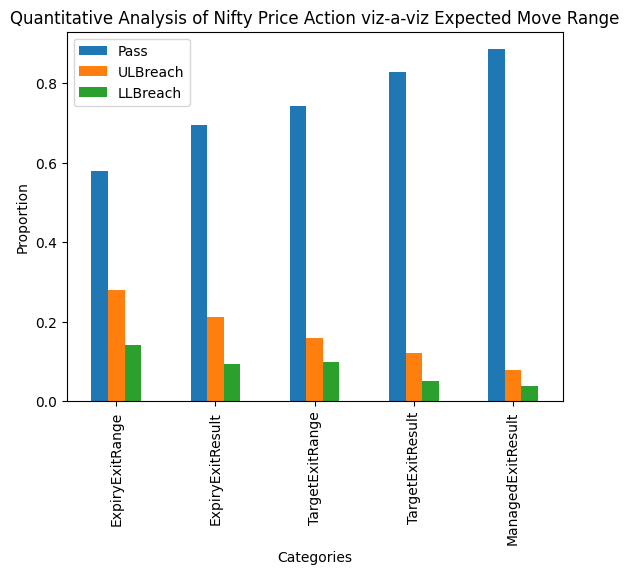

In [66]:
import matplotlib.pyplot as plt

# Selecting the proportion data from the nested index
proportion_data = ExpMvDf60DtePriceActionQunatitiveAnalysisResult.xs("proportion", level=1)

# Plotting the proportion data
proportion_data.plot(kind='bar')

# Adding labels and title
plt.xlabel("Categories")
plt.ylabel("Proportion")
plt.title("Quantitative Analysis of Nifty Price Action viz-a-viz Expected Move Range")

# Save the plot to a file
plt.savefig('/home/shankar/1MyProjects/test_poetry_project/plots/ExpMvDf60DtePriceActionQunatitiveAnalysisResult.png')

# Display the plot
plt.show()


# End